In [12]:
from models.model import Generator, Discriminator
from torchvision.utils import save_image
import config
from utils import load_checkpoint
import torch.optim as optim
import matplotlib.pyplot as plt

In [13]:
import torch

In [14]:
Z_DIM = 256  # should be 512 in original paper
IN_CHANNELS = 128 

In [162]:
gen = Generator(
        Z_DIM, IN_CHANNELS,config.ATTRIB_DIM, img_channels=config.CHANNELS_IMG
    ).to(config.DEVICE)

opt_gen = optim.Adam(gen.parameters(), lr=config.LEARNING_RATE, betas=(0.0, 0.99))
gen2 = Generator(
        Z_DIM, IN_CHANNELS,config.ATTRIB_DIM, img_channels=config.CHANNELS_IMG
    ).to(config.DEVICE)

opt_gen2 = optim.Adam(gen.parameters(), lr=config.LEARNING_RATE, betas=(0.0, 0.99))

In [196]:
load_checkpoint(
            "backend\generator-HQ-5-final-4.pth", gen, opt_gen, config.LEARNING_RATE,
        )


=> Loading checkpoint
=> Loading checkpoint


In [17]:
attributes = ['image_id', '5_o_Clock_Shadow', 'Bald', 'Bangs',
       'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Male','Mustache', 'No_Beard', 'Sideburns',
       'Straight_Hair', 'Wavy_Hair', 'Wearing_Hat',  'Young']  

In [167]:
noise = torch.randn(1,Z_DIM,1,1).to(config.DEVICE)

In [19]:
labels = torch.full((1,config.ATTRIB_DIM),-1.0, dtype=torch.float32).to(config.DEVICE)
    

In [207]:
labels[0][0] = -1.0   # 5_o_Clock_Shadow
labels[0][1] = -1.0     # Bald
labels[0][2] = -1.0      #bangs
labels[0][3] = -1.0      #Black_Hair
labels[0][4] = 1.0     #Blond_Hair
labels[0][5] = -1.0      #brown_hair
labels[0][6] = -1.0      #Eyeglasses
labels[0][7] = -1.0      #Goatee
labels[0][8] = -1.0     #Gray_Hair
labels[0][9] = -1.0      #Male
labels[0][10] = -1.0     #Mustache
labels[0][11] = -1.0     #No_Beard
labels[0][12] = -1.0    #Sideburns
labels[0][13] = -1.0     #Straight_Hair
labels[0][14] = -1.0     #Wavy_Hair
labels[0][15] = -1.0     #Wearing_Hat
labels[0][16] = 1.0   #young



In [ ]:
imgs = gen2(noise,labels,1.0, 4) * 0.5 + 0.5
imgs = imgs.detach()[0].cpu().numpy()
imgs = imgs.transpose(1,2,0)
plt.imshow(imgs)

In [212]:
l = torch.tensor([-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1], dtype=torch.float32)
l = l.view(1,l.shape[0]).to(config.DEVICE)
l2 = torch.tensor([-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,1,-1,-1,-1], dtype=torch.float32)
l2 = l2.view(1,l2.shape[0]).to(config.DEVICE)
l3 = torch.tensor([-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1], dtype=torch.float32)
l3 = l3.view(1,l3.shape[0]).to(config.DEVICE)


In [217]:
imgs1 = gen(noise,l, 1.0, 3) * 0.5 + 0.5
imgs1 = imgs1.detach()[0].cpu().numpy()
imgs1 = imgs1.transpose(1,2,0)
imgs2 = gen2(noise,l, 1.0,4 ) * 0.5 + 0.5
imgs2 = imgs2.detach()[0].cpu().numpy()
imgs2 = imgs2.transpose(1,2,0)



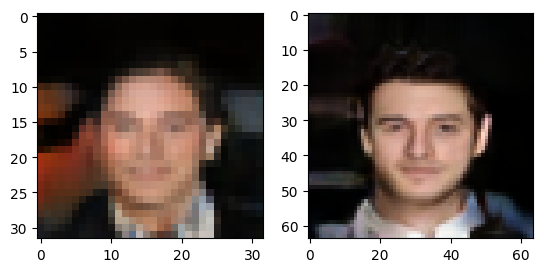

In [218]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(imgs1)
axes[1].imshow(imgs2)
